<a href="https://colab.research.google.com/github/shintothemars/Deteksi-Emosi/blob/main/Deteksi_Emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

#removal stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

#split dataset
from sklearn.model_selection import train_test_split

#Encoding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#ML model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

#save model
import joblib
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df = pd.read_csv('PRDECT-ID Dataset.csv')
df.head(5)

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [54]:
df.shape

(5400, 11)

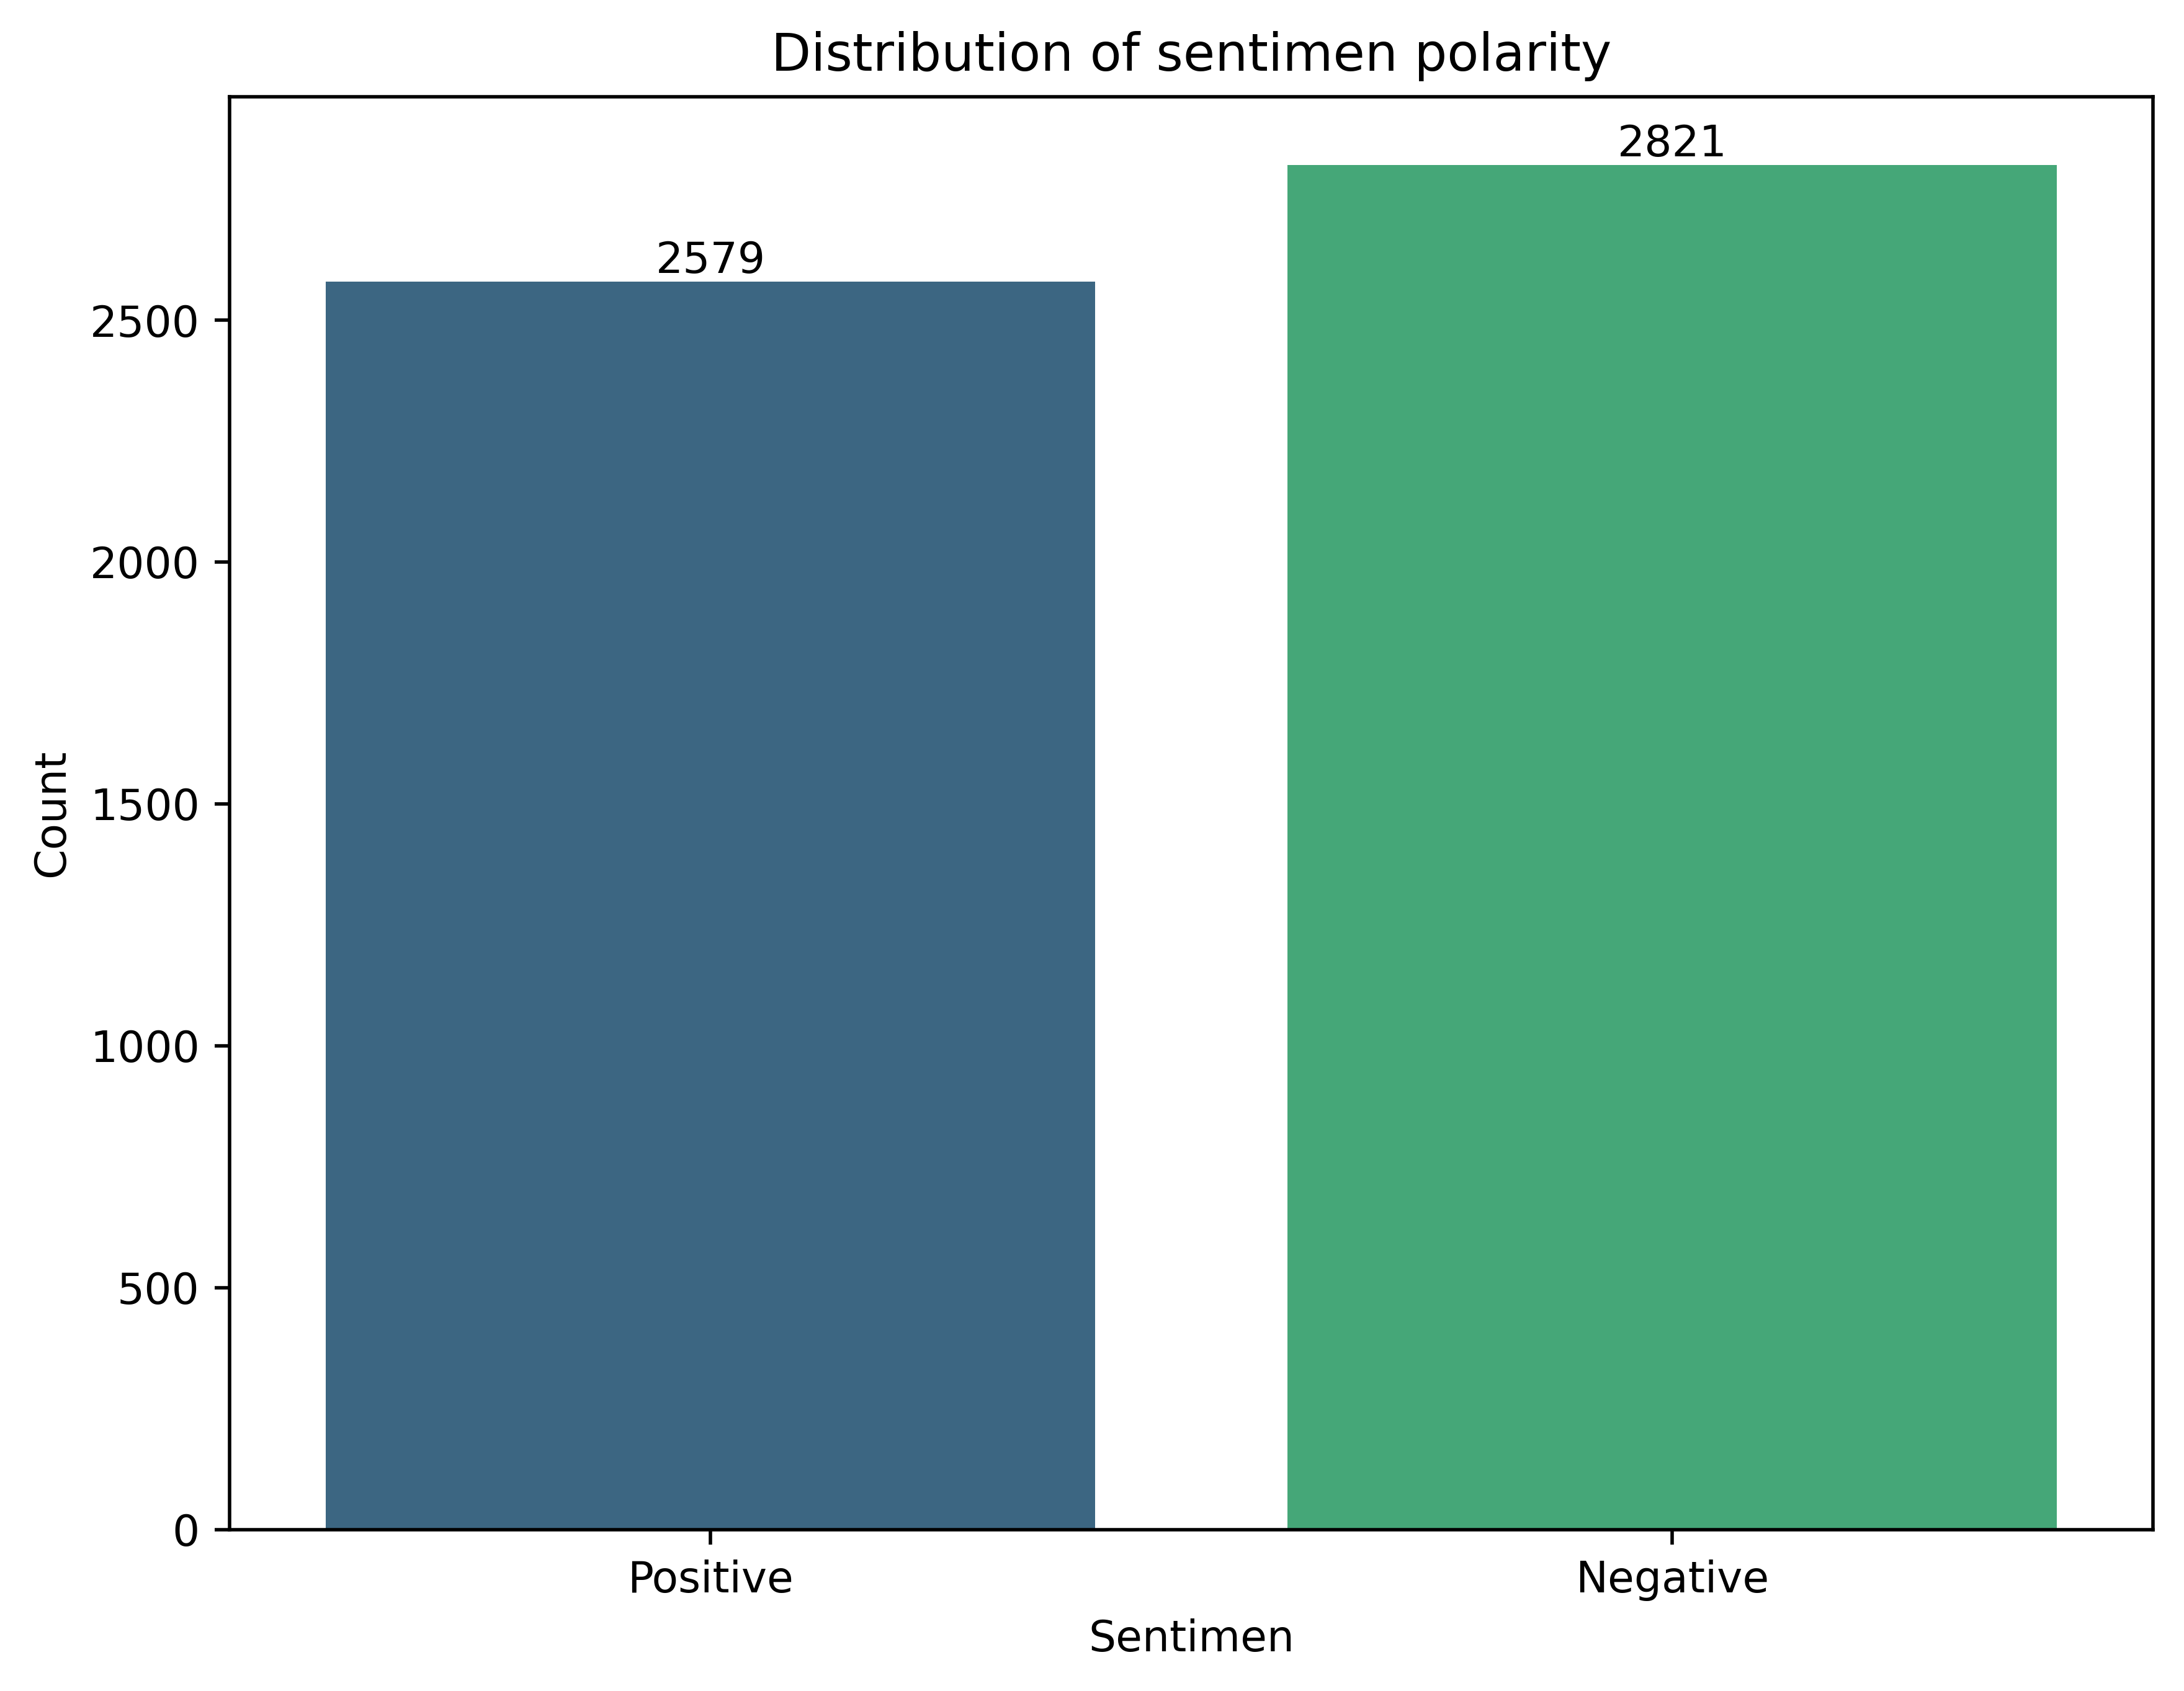

In [55]:
plt.figure(figsize=(8,6),dpi=500)
ax = sns.countplot(x='Sentiment',data=df,palette='viridis')

for p in ax.patches:
  ax.text(
      p.get_x()+p.get_width()/2,
      p.get_height(),
      f'{int(p.get_height())}',
      ha='center', va='bottom'
  )
plt.title('Distribution of sentimen polarity')
plt.xlabel('Sentimen')
plt.ylabel('Count')
plt.show()

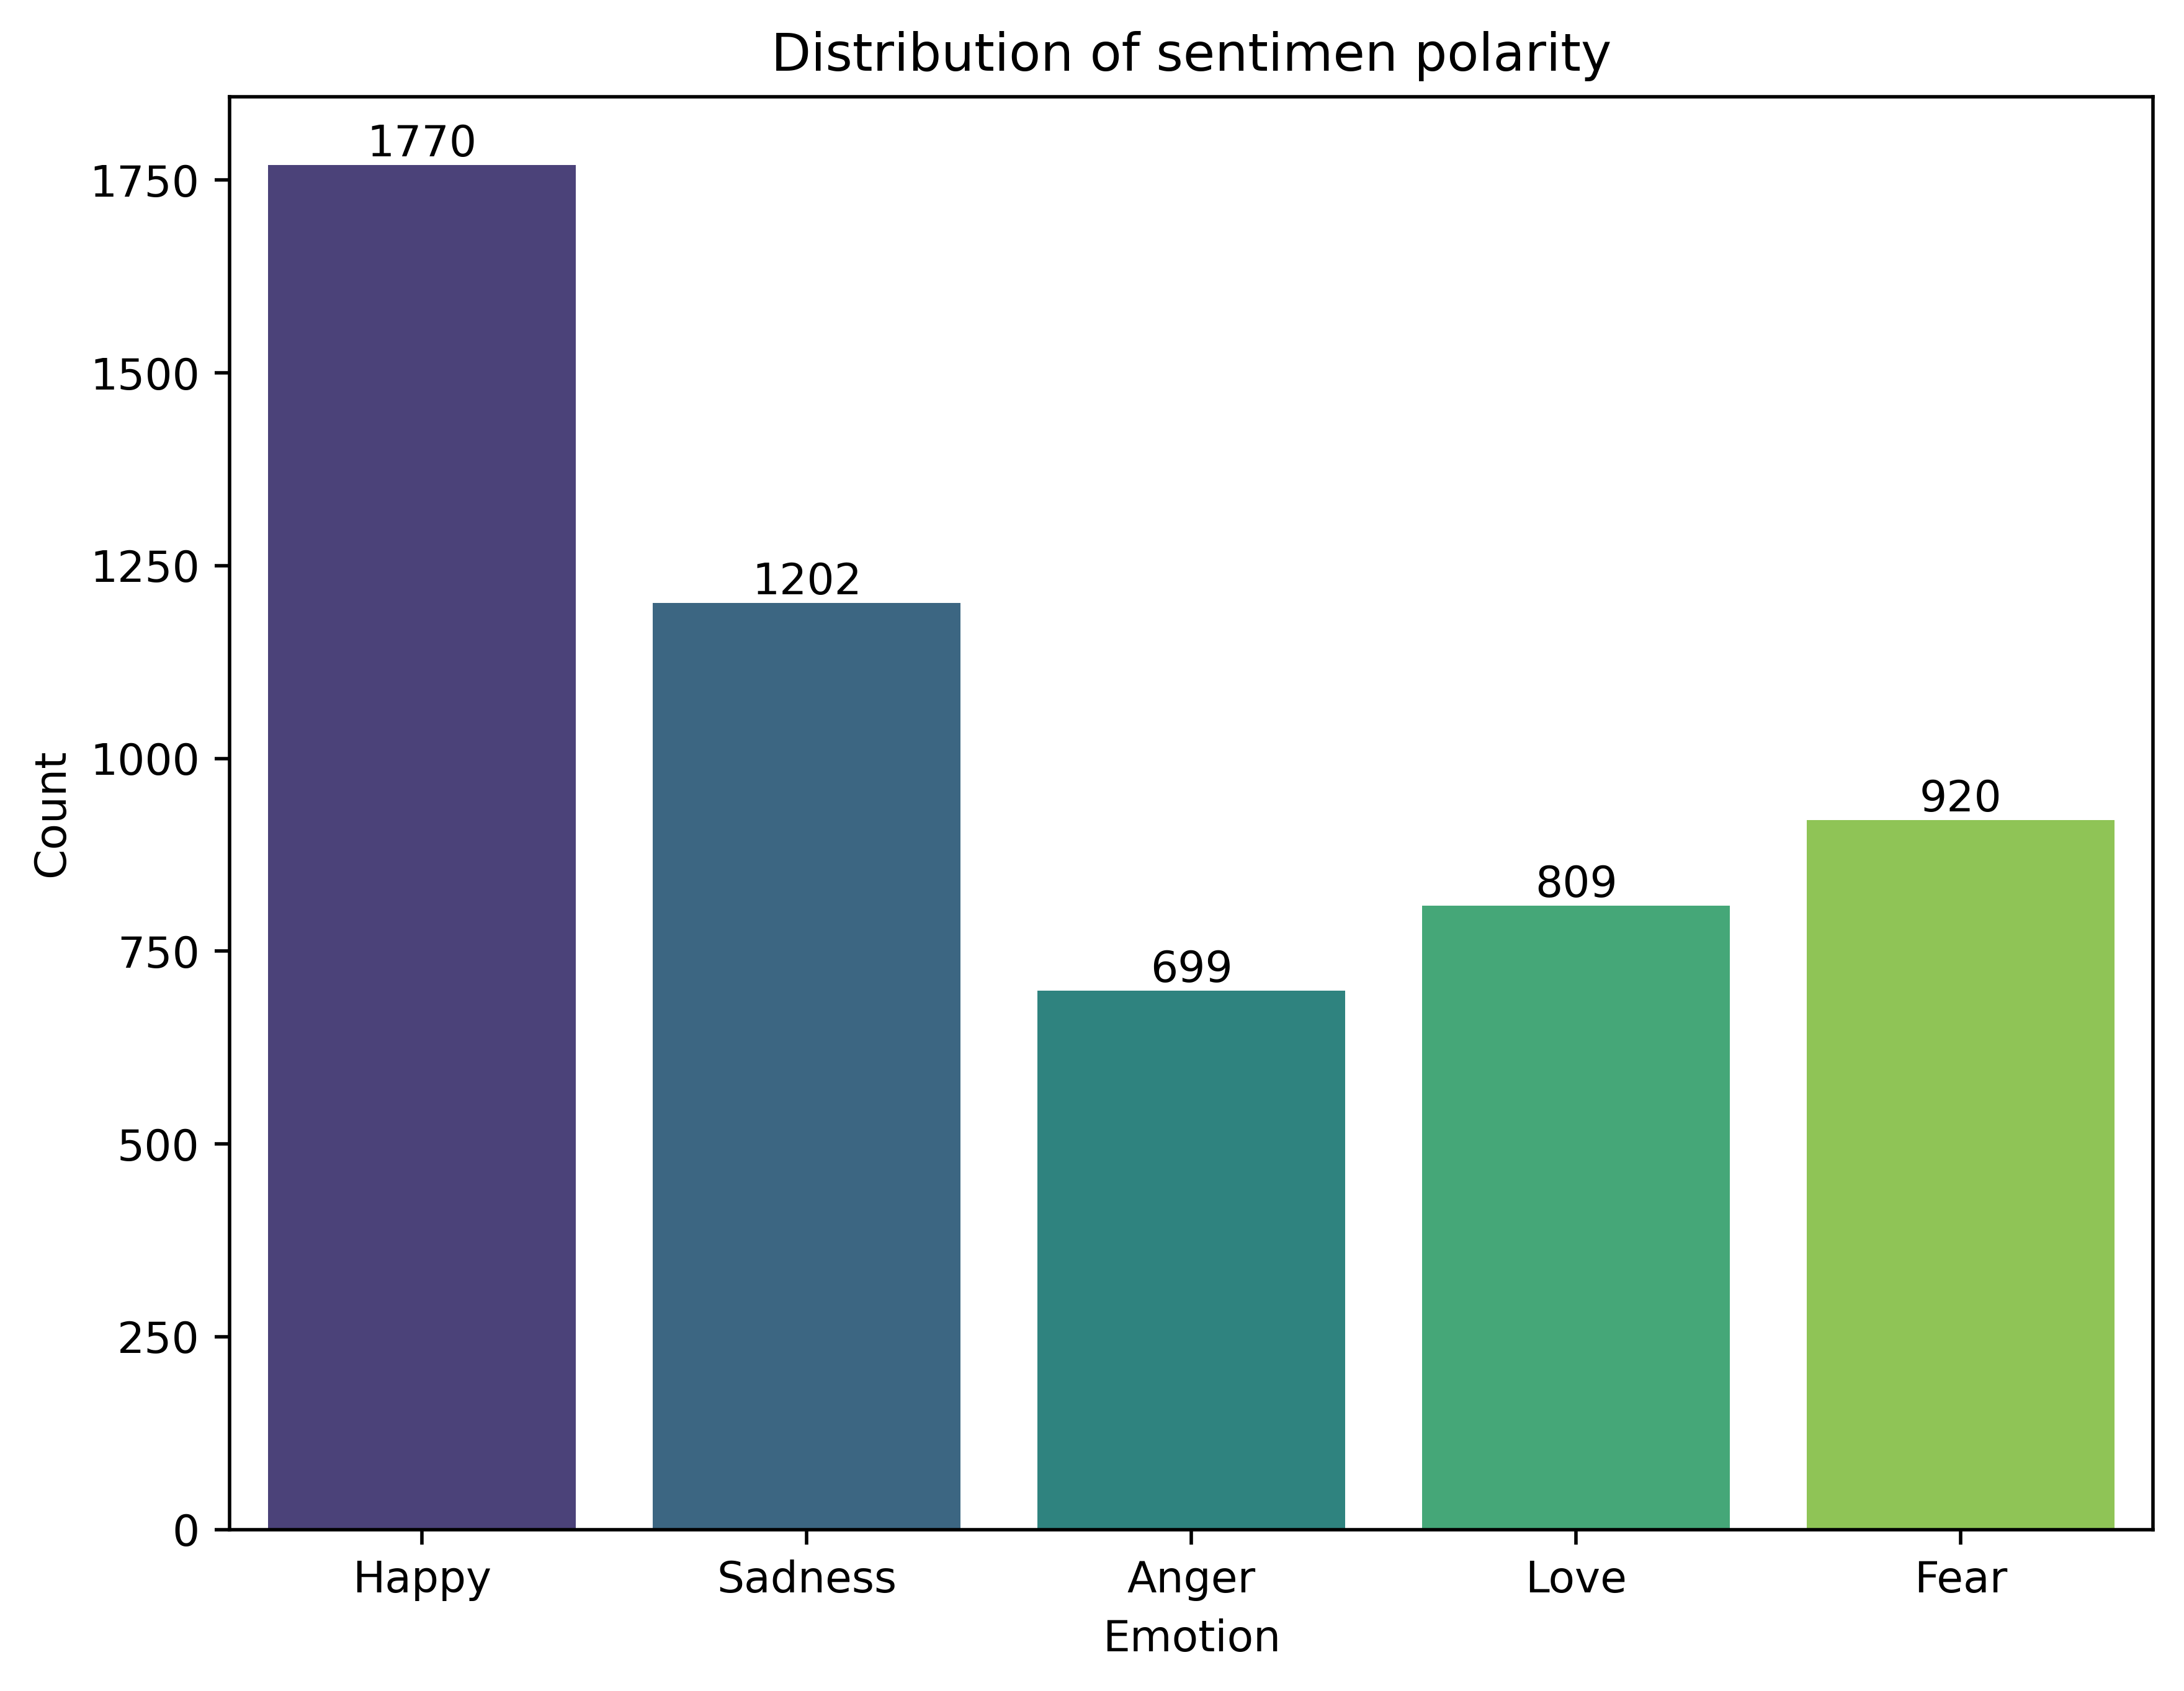

In [56]:
plt.figure(figsize=(8,6),dpi=500)
ax = sns.countplot(x='Emotion',data=df,palette='viridis')

for p in ax.patches:
  ax.text(
      p.get_x()+p.get_width()/2,
      p.get_height(),
      f'{int(p.get_height())}',
      ha='center', va='bottom'
  )
plt.title('Distribution of sentimen polarity')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Selection

In [57]:
df_selected = df[['Category','Customer Review','Sentiment','Emotion']]
df_selected.head()

,Category,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


## Preprocessing *Text*

In [58]:
def preprocess_text(texts):
    processed_texts = []
    for sent in texts:
        # ubah ke lowercase
        text = str(sent).lower()

        # regex: hapus karakter selain huruf & spasi
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # hapus spasi berlebih
        text = " ".join(text.split())

        # tokenisasi
        tokens = word_tokenize(text)

        # hapus stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # gabungkan kembali token
        processed_texts.append(" ".join(tokens))

    return processed_texts


# Apply the preprocessed phase to datasey

In [59]:
stop_words = set(stopwords.words('english'))
df_selected['preprocessed'] = preprocess_text(df_selected['Customer Review'])
df_selected.head()

,Category,Customer Review,Sentiment,Emotion,preprocessed
0,Computers and Laptops,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy,alhamdulillah berfungsi dengan baik packaging ...
1,Computers and Laptops,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy,barang bagus dan respon cepat harga bersaing d...
2,Computers and Laptops,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy,barang bagus berfungsi dengan baik seler ramah...
3,Computers and Laptops,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy,bagus sesuai harapan penjual nya juga ramah tr...
4,Computers and Laptops,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy,barang bagus pengemasan aman dapat berfungsi d...


In [60]:
df_fixed=df_selected[['preprocessed','Sentiment','Emotion']]
df_fixed.head()

,preprocessed,Sentiment,Emotion
0,alhamdulillah berfungsi dengan baik packaging ...,Positive,Happy
1,barang bagus dan respon cepat harga bersaing d...,Positive,Happy
2,barang bagus berfungsi dengan baik seler ramah...,Positive,Happy
3,bagus sesuai harapan penjual nya juga ramah tr...,Positive,Happy
4,barang bagus pengemasan aman dapat berfungsi d...,Positive,Happy


# Label Encoding

In [61]:
label_encoder_sentiment = LabelEncoder()
label_encoder_emotion = LabelEncoder()
df_fixed['encoded_sentiment'] = label_encoder_sentiment.fit_transform(df_fixed['Sentiment'])
df_fixed['encoded_emotion'] = label_encoder_emotion.fit_transform(df_fixed['Emotion'])
df_fixed.head()

,preprocessed,Sentiment,Emotion,encoded_sentiment,encoded_emotion
0,alhamdulillah berfungsi dengan baik packaging ...,Positive,Happy,1,2
1,barang bagus dan respon cepat harga bersaing d...,Positive,Happy,1,2
2,barang bagus berfungsi dengan baik seler ramah...,Positive,Happy,1,2
3,bagus sesuai harapan penjual nya juga ramah tr...,Positive,Happy,1,2
4,barang bagus pengemasan aman dapat berfungsi d...,Positive,Happy,1,2


In [62]:
df_fixed_selected= df_fixed[['preprocessed','encoded_sentiment','encoded_emotion']]
df_fixed_selected.head()

,preprocessed,encoded_sentiment,encoded_emotion
0,alhamdulillah berfungsi dengan baik packaging ...,1,2
1,barang bagus dan respon cepat harga bersaing d...,1,2
2,barang bagus berfungsi dengan baik seler ramah...,1,2
3,bagus sesuai harapan penjual nya juga ramah tr...,1,2
4,barang bagus pengemasan aman dapat berfungsi d...,1,2


# Spliting Dataset

In [63]:
x = df_fixed_selected['preprocessed']
y = df_fixed_selected['encoded_emotion']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print ("shape of x_train:",x_train.shape)
print ("shape of x_test:",x_test.shape)
print ("shape of y_train:",y_train.shape)
print ("shape of y_test:",y_test.shape)

shape of x_train: (4320,)
shape of x_test: (1080,)
shape of y_train: (4320,)
shape of y_test: (1080,)


# Vectorization

In [64]:
tfidf_vectorizer = TfidfVectorizer(max_features=300)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [65]:
x_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37365 stored elements and shape (4320, 300)>

# Random Forest

In [66]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    }
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              rf_param_grid,
                              cv=5,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=-1
                              )
rf_grid_search.fit(x_train_tfidf, y_train)

print("Best parameter Of Random Forest: ", rf_grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter Of Random Forest:  {'max_depth': 30, 'n_estimators': 200}


In [67]:
rf_best_model = rf_grid_search.best_estimator_
rf_best_model.fit(x_train_tfidf, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [68]:
rf_y_test_pred = rf_best_model.predict(x_test_tfidf)

rf_y_test_pred_original = label_encoder_emotion.inverse_transform(rf_y_test_pred)
rf_y_test_original = label_encoder_emotion.inverse_transform(y_test)

print(classification_report(rf_y_test_original, rf_y_test_pred_original,digits=4))

              precision    recall  f1-score   support

       Anger     0.4444    0.1379    0.2105       145
        Fear     0.4118    0.5283    0.4628       159
       Happy     0.6145    0.8596    0.7166       356
        Love     0.6410    0.2994    0.4082       167
     Sadness     0.5804    0.5850    0.5827       253

    accuracy                         0.5630      1080
   macro avg     0.5384    0.4820    0.4762      1080
weighted avg     0.5579    0.5630    0.5322      1080



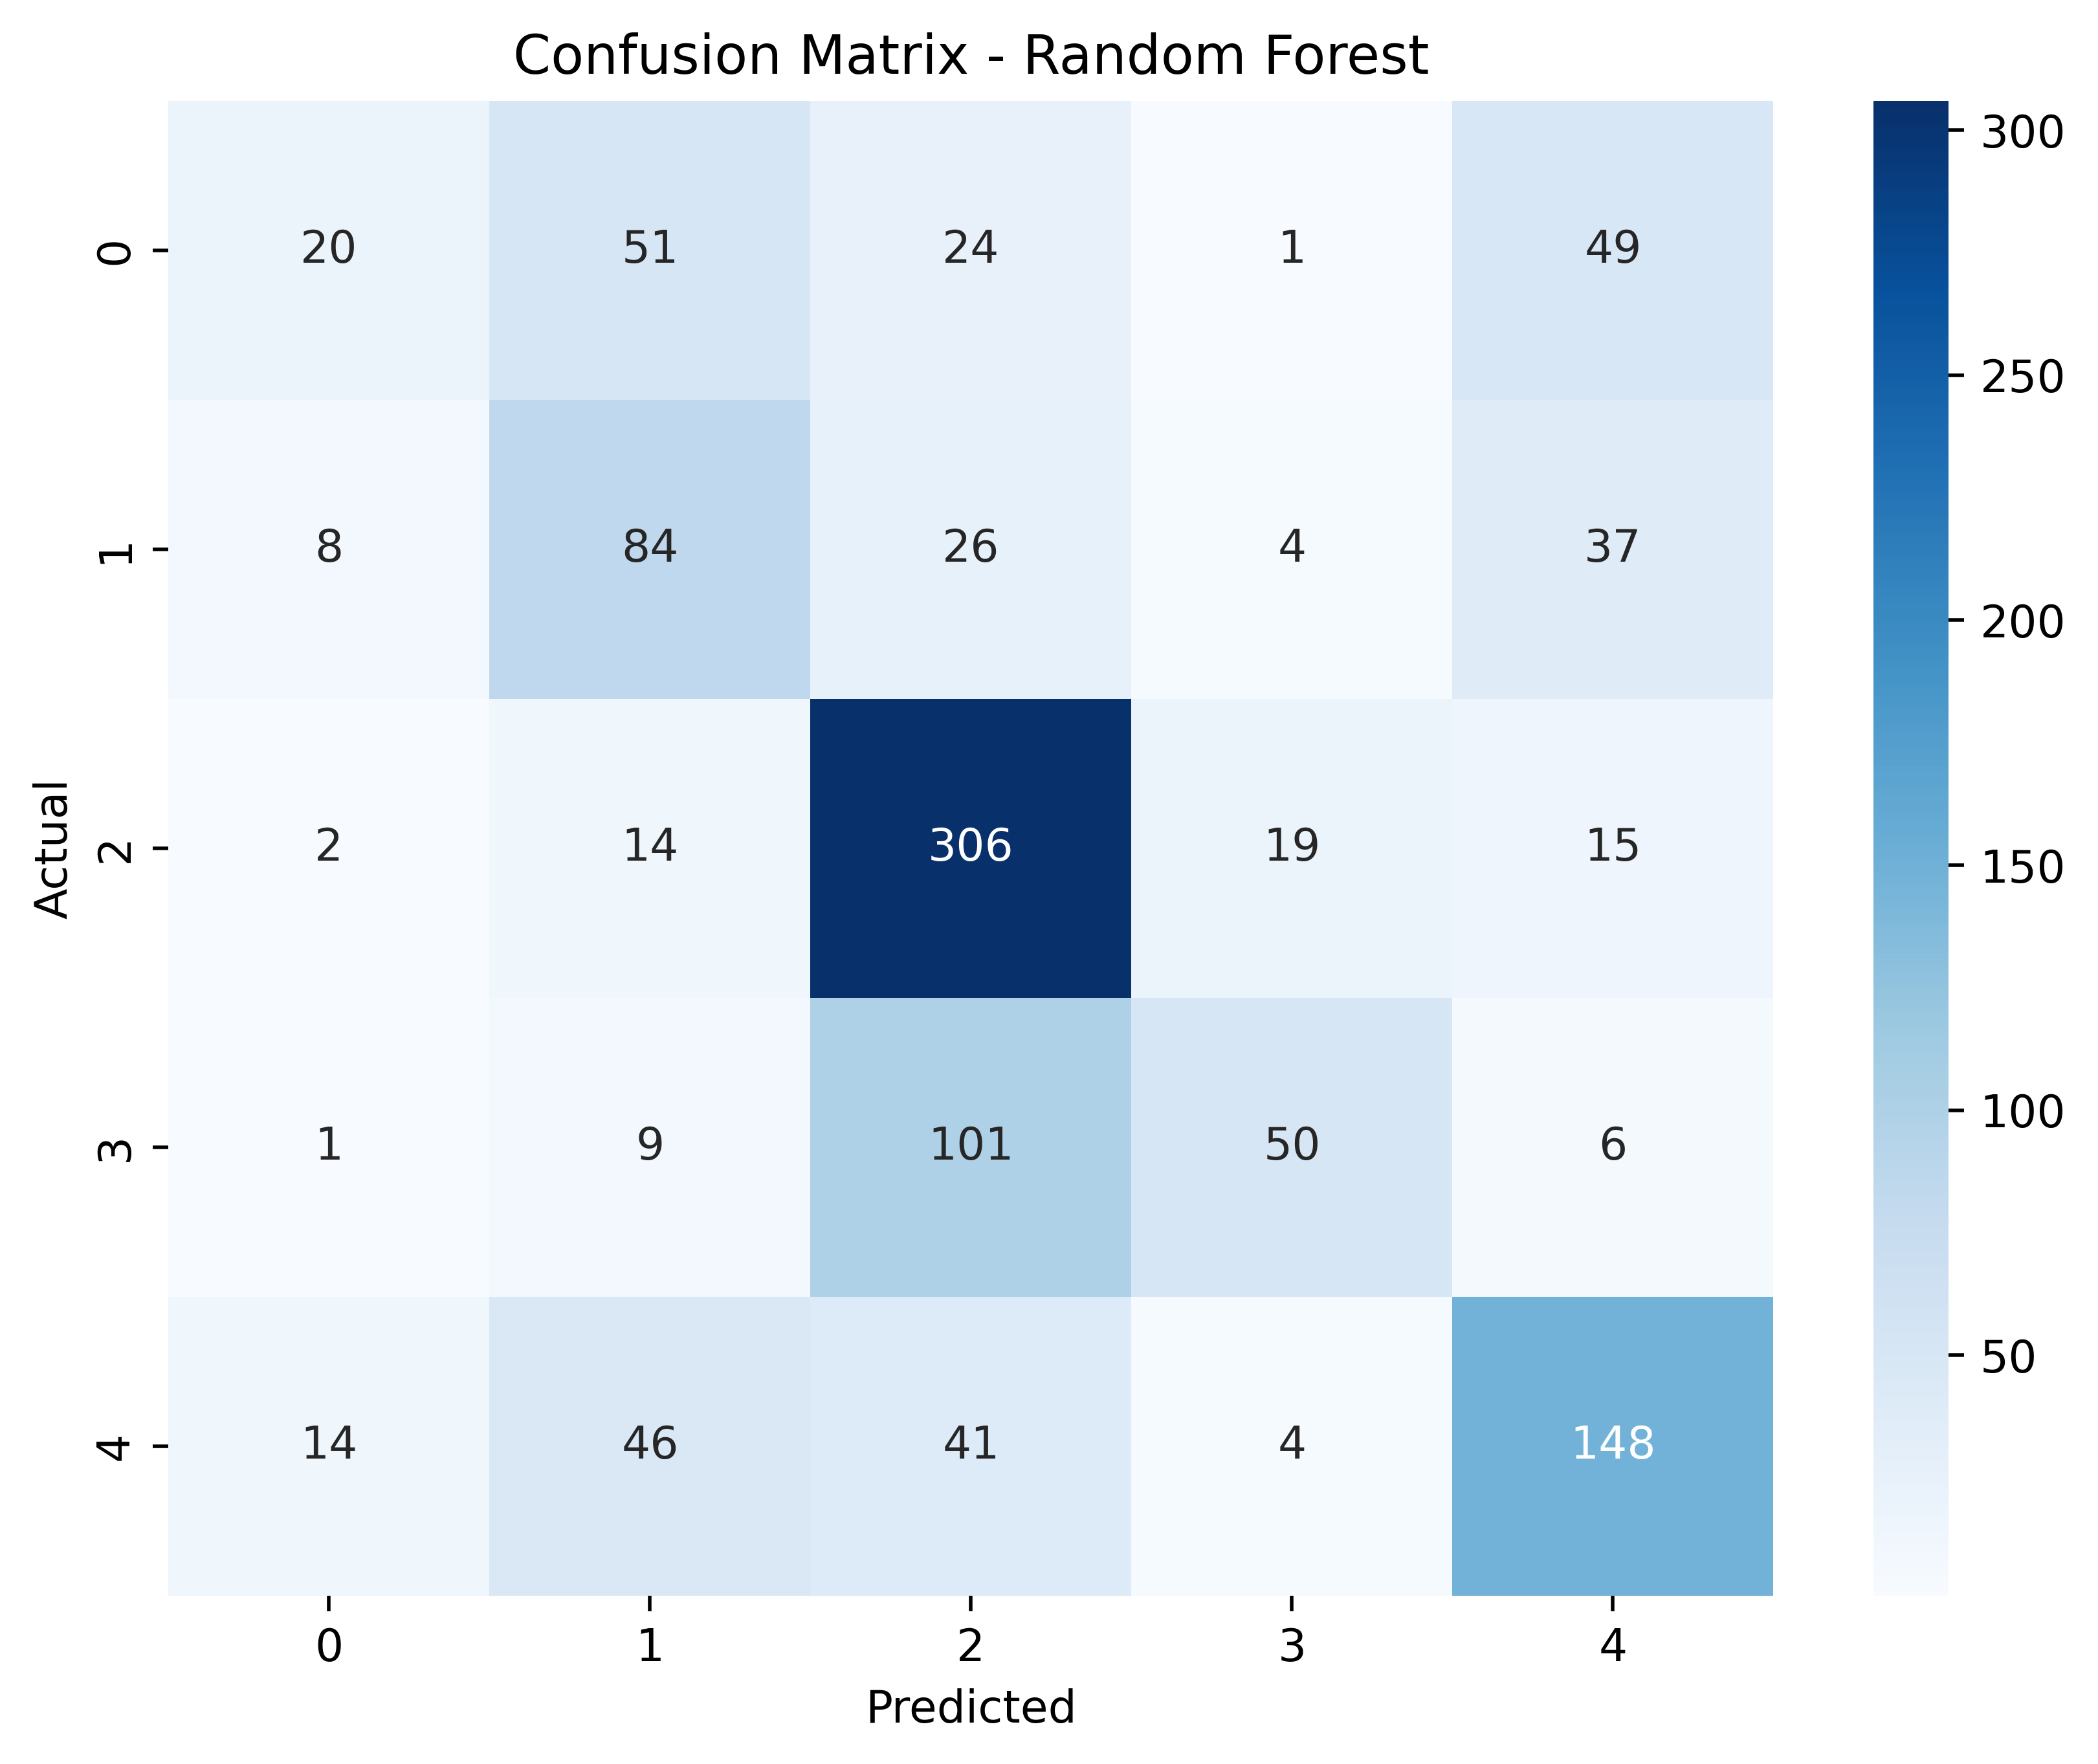

In [69]:
rf_y_test_pred = rf_best_model.predict(x_test_tfidf)
rf_cm_test = confusion_matrix(y_test, rf_y_test_pred)

plt.figure(figsize=(8,6),dpi=500)
sns.heatmap(rf_cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
rf_accuracy = accuracy_score(y_test, rf_y_test_pred)
rf_precision = precision_score(y_test, rf_y_test_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_test_pred, average='weighted')
rf_f1= f1_score(y_test, rf_y_test_pred, average='weighted')
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Accuracy: 0.562962962962963
Precision: 0.5579189984899096
Recall: 0.562962962962963
F1 Score: 0.5322343691933852


# Naive Bayes